            timestamp  interval  temp_celsius  wind_speed  wind_dir  is_day  \
0 2025-08-21 09:45:00     900.0          19.9         4.3        83     1.0   
1 2025-08-21 09:45:00     900.0          18.8         7.4       227     1.0   
2 2025-08-21 09:45:00     900.0          20.8         7.6        61     1.0   
3 2025-08-21 09:45:00     900.0          20.9         5.4        45     1.0   
4 2025-08-21 09:45:00     900.0          24.5        10.5       333     1.0   

   weathercode        city            weather_desc  
0            0    Warszawa            Czyste niebo  
1            2      Gdańsk  Częściowe zachmurzenie  
2            3    Sitaniec            Zachmurzenie  
3            3  Hrubieszów            Zachmurzenie  
4            0    Portimao            Czyste niebo  


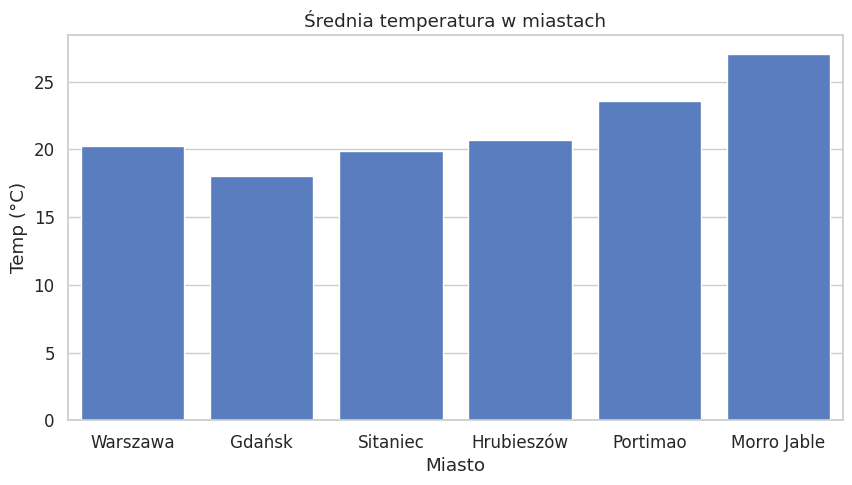

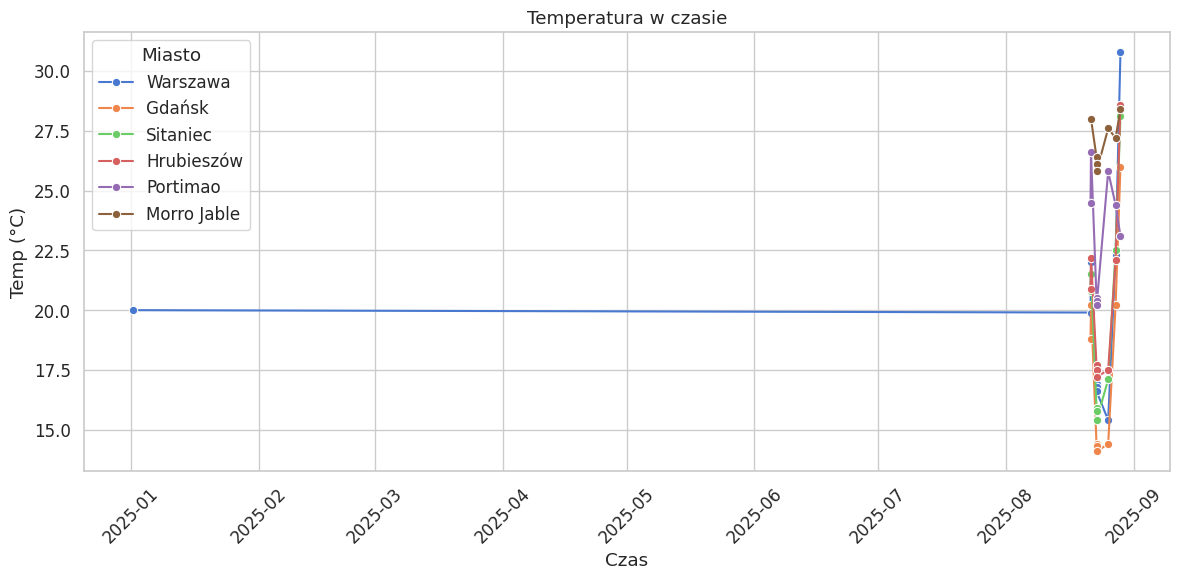

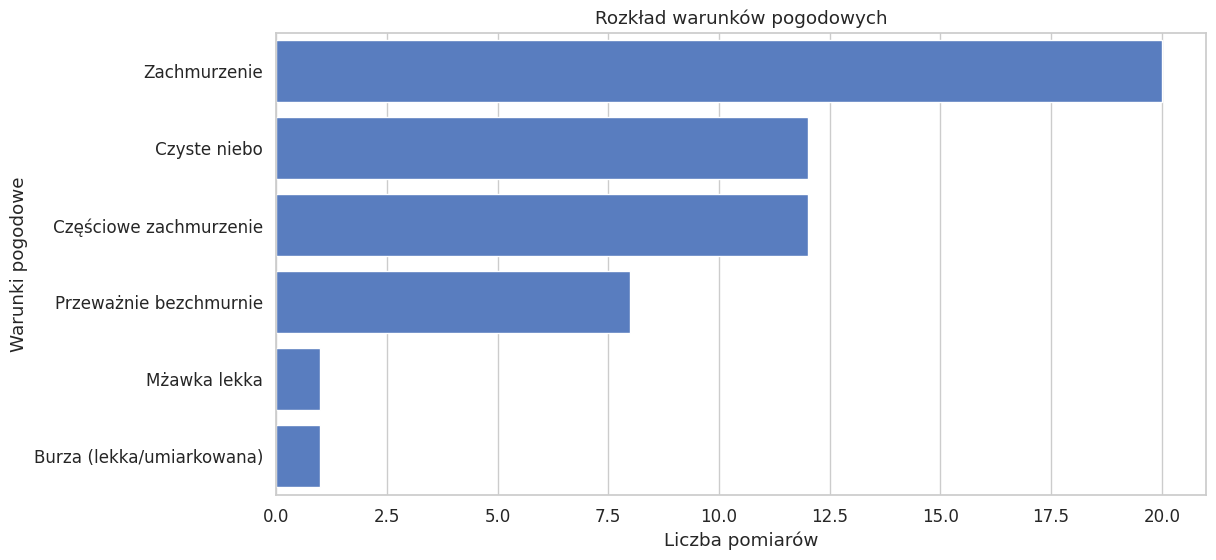

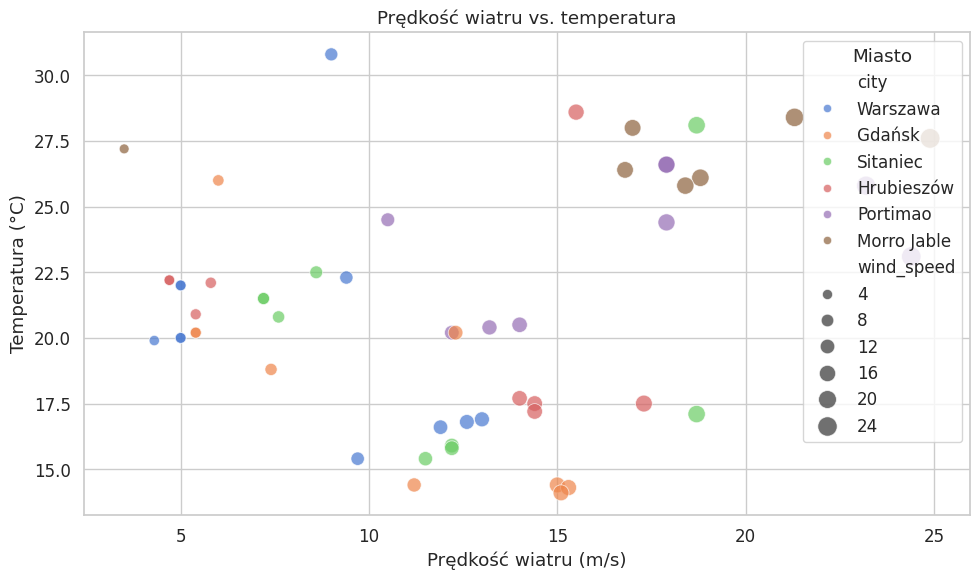

In [2]:
# %%
# Importujemy potrzebne biblioteki
import os
from dotenv import load_dotenv
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

# Wczytanie zmiennych środowiskowych z pliku .env
load_dotenv()

# Składamy connection string do PostgreSQL
DB_URL = (
    f"postgresql://{os.getenv('POSTGRES_USER')}:"
    f"{os.getenv('POSTGRES_PASSWORD')}@"
    f"{os.getenv('POSTGRES_HOST')}:{os.getenv('POSTGRES_PORT')}/"
    f"{os.getenv('POSTGRES_DB')}"
)

# Połączenie z bazą danych PostgreSQL
engine = create_engine(DB_URL)

# Ustawienia notebooka, aby wykresy pokazywały się "inline"
%matplotlib inline

# Styl wykresów Seaborn
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Automatyczne czyszczenie starych wykresów przy każdej komórce
plt.close('all')

# Ścieżka do folderu na wykresy (z poziomu notebooks/)
PLOTS_DIR = "../docs/plots"
os.makedirs(PLOTS_DIR, exist_ok=True)

# %%
# Pobieramy dane z tabeli "weather"
df = pd.read_sql("SELECT * FROM weather", engine)

# Konwersja timestamp na datetime (jeśli nie jest)
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Podgląd danych
print(df.head())

# %%
# Średnia temperatura w miastach (wykres słupkowy)
plt.figure(figsize=(10,5))
sns.barplot(x="city", y="temp_celsius", data=df, errorbar=None)
plt.title("Średnia temperatura w miastach")
plt.ylabel("Temp (°C)")
plt.xlabel("Miasto")
plt.savefig(f"{PLOTS_DIR}/avg_temp.png")
plt.show()
plt.close()

# %%
# Temperatury w czasie dla każdego miasta (wykres liniowy)
plt.figure(figsize=(12,6))
sns.lineplot(x="timestamp", y="temp_celsius", hue="city", data=df, marker="o")
plt.title("Temperatura w czasie")
plt.ylabel("Temp (°C)")
plt.xlabel("Czas")
plt.xticks(rotation=45)
plt.legend(title="Miasto")
plt.tight_layout()
plt.savefig(f"{PLOTS_DIR}/temp_over_time.png")
plt.show()
plt.close()

# %%
# Histogram pogody (liczba pomiarów dla opisów)
plt.figure(figsize=(12,6))
sns.countplot(y="weather_desc", data=df, order=df['weather_desc'].value_counts().index)
plt.title("Rozkład warunków pogodowych")
plt.xlabel("Liczba pomiarów")
plt.ylabel("Warunki pogodowe")
plt.savefig(f"{PLOTS_DIR}/weather_distribution.png")
plt.show()
plt.close()

# %%
# Wykres prędkości wiatru vs. temperatura (scatter plot)
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="wind_speed", y="temp_celsius", hue="city", size="wind_speed",
    data=df, sizes=(50, 200), alpha=0.7
)
plt.title("Prędkość wiatru vs. temperatura")
plt.xlabel("Prędkość wiatru (m/s)")
plt.ylabel("Temperatura (°C)")
plt.legend(title="Miasto")
plt.tight_layout()
plt.savefig(f"{PLOTS_DIR}/wind_vs_temp.png")
plt.show()
plt.close()
